<a href="https://colab.research.google.com/github/thetrotfreak/MCA572/blob/cv/2347111_CV_P9.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

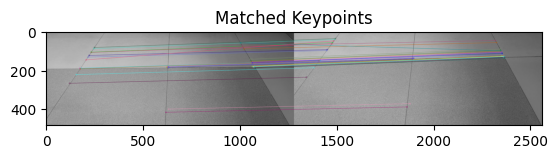

3D Coordinates of matched points:
[-1.4138404  -0.15262519 12.258917  ]
[-1.3890984  -0.15224375 12.234296  ]
[ 1.1342546  -0.15150693 10.520819  ]
[ 1.0799719  -0.25067094 10.529289  ]
[ 1.1307901  -0.16379634 10.542289  ]
[-1.1565158  -0.44323325 11.864871  ]
[ 1.130462  -0.1610687 10.537445 ]
[ 1.10113    -0.20820008 10.512535  ]
[ 1.118675   -0.17965174 10.523075  ]
[ 1.1264448  -0.16250296 10.529572  ]
[ 1.1201311  -0.15633449 10.5576105 ]
[-1.2044762  -0.38970542 11.96052   ]
[ 1.1336495  -0.15752184 10.54001   ]
[ 1.1295567  -0.16398278 10.538647  ]
[ 1.1064606 -0.1542041 10.520063 ]
[ 1.131407  -0.1478687 10.513876 ]
[-0.01510529 -0.15767838 11.301802  ]
[ 1.1239539  -0.15142299 10.51421   ]
[ 1.0922188  -0.22363636 10.51432   ]
[-1.3097658 -0.3641425 12.664622 ]
[-1.6116444  0.0826132 12.556536 ]
[-0.03950948 -0.15734863 11.346342  ]
[-1.1811223  -0.38601714 11.744389  ]
[-1.3080269 -0.3328817 12.472481 ]
[-1.3874404 -0.1536899 12.225473 ]
[ 1.1557668  -0.13620229 10.547656  ]

In [6]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Load the stereo images
left_img = cv2.imread('left.jpg', cv2.IMREAD_GRAYSCALE)
right_img = cv2.imread('right.jpg', cv2.IMREAD_GRAYSCALE)

# Detect and compute keypoints using ORB
orb = cv2.ORB_create()
kp1, des1 = orb.detectAndCompute(left_img, None)
kp2, des2 = orb.detectAndCompute(right_img, None)

# Match descriptors using the Brute-Force matcher
bf = cv2.BFMatcher(cv2.NORM_HAMMING, crossCheck=True)
matches = bf.match(des1, des2)
matches = sorted(matches, key=lambda x: x.distance)

# Draw matched keypoints
matched_img = cv2.drawMatches(left_img, kp1, right_img, kp2, matches[:50], None, flags=cv2.DrawMatchesFlags_NOT_DRAW_SINGLE_POINTS)

plt.imshow(matched_img)
plt.title("Matched Keypoints")
plt.show()

# Extract matched points
pts1 = np.array([kp1[m.queryIdx].pt for m in matches], dtype=np.float32)
pts2 = np.array([kp2[m.trainIdx].pt for m in matches], dtype=np.float32)

# Define camera intrinsic parameters
focal_length = (24 * 1280) / 7.6 # focal length in pixels
cx, cy = 1280/2, 482/2 # image center
camera_matrix = np.array([[focal_length, 0, cx], [0, focal_length, cy], [0, 0, 1]])

# Compute the essential matrix
essential_matrix, _ = cv2.findEssentialMat(pts1, pts2, camera_matrix, method=cv2.RANSAC, prob=0.999, threshold=1.0)

# Recover pose
_, R, t, _ = cv2.recoverPose(essential_matrix, pts1, pts2, camera_matrix)

# Triangulate points to calculate 3D coordinates
proj_matrix1 = np.hstack((np.eye(3), np.zeros((3, 1))))  # Projection matrix for the left image
proj_matrix2 = np.hstack((R, t))  # Projection matrix for the right image
proj_matrix1 = camera_matrix @ proj_matrix1
proj_matrix2 = camera_matrix @ proj_matrix2

points_4d_hom = cv2.triangulatePoints(proj_matrix1, proj_matrix2, pts1.T, pts2.T)

# Convert from homogeneous to 3D coordinates
points_3d = points_4d_hom[:3, :] / points_4d_hom[3, :]
points_3d = points_3d.T

#  Print the 3D coordinates
print("3D Coordinates of matched points:")
for point in points_3d:
    print(point)